In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import auc, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv', header=None)[0]
y_test = pd.read_csv('data/y_test.csv', header=None)[0]
scaler = StandardScaler()
X_train['normAmount'] = scaler.fit_transform(np.array(X_train['Amount']).reshape(-1, 1))
X_test['normAmount'] = scaler.transform(np.array(X_test['Amount']).reshape(-1, 1))
X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

In [5]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print ("---Train---")
    print ("Precision: %.4f" % (precision_score(y_train, y_train_pred)))
    print ("Recall: %.4f" % (recall_score(y_train, y_train_pred)))
    print ("F1: %.4f" % (f1_score(y_train, y_train_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_train, y_train_pred))
    print ("\n---Test---")
    print ("Precision: %.4f" % (precision_score(y_test, y_test_pred)))
    print ("Recall: %.4f" % (recall_score(y_test, y_test_pred)))
    print ("F1: %.4f" % (f1_score(y_test, y_test_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_test, y_test_pred))

def aucpr(y_true, y_score):
    precision, recall, threshold = precision_recall_curve(y_true, y_score)
    indices = np.argsort(precision)
    precision = precision[indices]
    recall = recall[indices]
    plt.plot(recall, precision, '.')
    plt.show()
    return auc(precision, recall)

In [ ]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
for ga in [0.1, 0.3, 0.5, 0.7, 0.9]:
    ocsvm = OneClassSVM(gamma=ga, random_state=0)
    ocsvm.fit(X_train)

    y_train_pred = lof.predict(X_train)
    y_test_pred = lof.predict(X_test)
    y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
    y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
    
    train_prec.append(precision_score(y_train, y_train_pred))
    test_prec.append(precision_score(y_test, y_test_pred))
    train_rec.append(recall_score(y_train, y_train_pred))
    test_rec.append(recall_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))
    
plt.plot(neighs, train_prec, label='train')
plt.plot(neighs, test_prec, label='test')
plt.title("Precision - max_samples")
plt.legend()
plt.show()
    
plt.plot(neighs, train_rec, label='train')
plt.plot(neighs, test_rec, label='test')
plt.title("Recall - max_samples")
plt.legend()
plt.show()    

plt.plot(neighs, train_f1, label='train')
plt.plot(neighs, test_f1, label='test')
plt.title("F1 - max_samples")
plt.legend()
plt.show()

/home/wangsun/anaconda3/lib/python3.6/site-packages/sklearn/svm/classes.py:1177: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


---Train---
Precision: 0.0019
Recall: 0.7024
F1: 0.0038
Confusion matrix:
[[ 75791 123237]
 [   100    236]]
---Test---
Precision: 0.0018
Recall: 0.9872
F1: 0.0036
Confusion matrix:
[[  281 85006]
 [    2   154]]


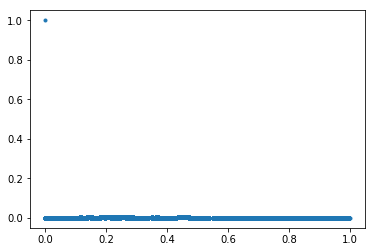

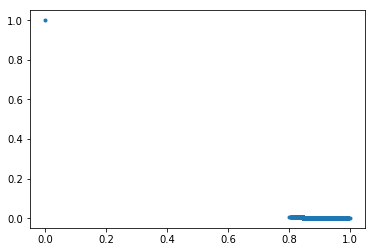

(0.1072353534514993, 0.40184055611204)

In [6]:
ocsvm = OneClassSVM(gamma=0.3, nu=0.01)
ocsvm.fit(X_train)

y_train_pred = ocsvm.predict(X_train)
y_test_pred = ocsvm.predict(X_test)
y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

y_train_score = -ocsvm.score_samples(X_train)
y_test_score = -ocsvm.score_samples(X_test)
aucpr(y_train, y_train_score), aucpr(y_test, y_test_score)